# Homework: Spectral clustering


<span style="color: red; font-size: 14pt">Deadline: none</span>

**Requirements**: 

- The report shoulbe in a file: ``MLDM2020-HSE-HW1-Spectral_<your_full_name>.ipynb``;
- It should be sent dmitrii.ignatov@gmail.com and egurnovdima@gmail.com with the topic [MLDM2020-HSE-HW-Spectral]-<your_full_name>.



In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In this exercise we follow graph clustering example from David Gleich's tutorial: https://www.dropbox.com/s/w06niyzfe2r8y90/tutorial.pdf?dl=0.

### Part 1. Finding a partition (20%)
Generate a graph repsresnted by its adjecency matrix that consists of two communities.

In [88]:
# the number of vertices
# (each vertex is an individual actor, for example, a person with certain political views, e.g. republican or democrat

n = 1000

# an array of n vertices
x = np.arange(n)

# random permutations
np.random.shuffle(x)

# the size of the first group
gs = 450

# let us select gs group members to the first group
group1 = x[:gs]

# and n-gs representatives to the second one
group2 = x[gs:]

# the probability of connection within the first group
p_group1 = 0.5

# the probability of connection within the second group
p_group2 = 0.4

# intergroup connections
p_between = 0.1

# initialistion of the adjacency matrix nxn
A = np.zeros([n, n])

In [89]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
assert A.shape == (1000, 1000)

In [91]:
# adjecency submatrix for the first group
A[np.ix_(group1, group1)].shape

(450, 450)

In [92]:
# generation of connections in the first group
A[np.ix_(group1, group1)] = np.random.rand(gs, gs) < p_group1

# generation of connections in the second group
A[np.ix_(group2, group2)] = np.random.rand(n-gs, n-gs) < p_group2

# genegation of intergroup connections
A[np.ix_(group1, group2)] = np.random.rand(gs, n-gs) < p_between

# we need a symmetric matrix for modeling "friendship relationship"
# and cut the upper triangle matrix
A = np.triu(A,1)


# let us transpose it and add to the upper triangle matrix
A = A + A.T

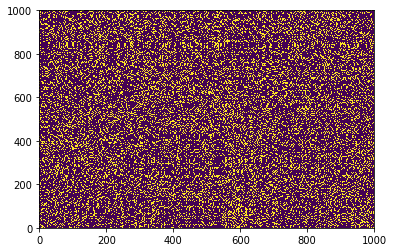

In [93]:
# let us have a look (it seems, the structure is absent)
plt.pcolormesh(A);

In [110]:
#checking the symmetry
sum(sum(np.abs(A-A.T)))

0.0

In [112]:
#cheking the main diaoganl -- it should be empty
sum(np.diag(A))

0.0

Follow the hints from the tutorial. First, calculate the Laplacian matrix, L=D-A, find its second smallest eigenvector, sort it, and use the found indicies and restore the model structure as the two group of  "friends".

In [228]:
D=np.diag(sum(A))

In [229]:
L=D-A

In [230]:
from scipy.sparse.linalg import eigsh #a better choice than numpy

In [196]:
#W,V=np.linalg.eigh(L)

In [197]:
W,V=eigsh(L,which='SA') #six (by default) eignvalues are sorted in desceding order (by which='SA')

In [231]:
W.shape

(6,)

In [234]:
min(W),max(W)

(-1.4988715425951263e-14, 195.91421657192842)

In [235]:
W

array([-1.49887154e-14,  4.53544813e+01,  1.92086843e+02,  1.93323305e+02,
        1.95134585e+02,  1.95914217e+02])

In [245]:
V[:,0] #the first samllest eigenvalue corresponds to the frist eigenvector – should be a constant vector k*e, where e=(1,1,...,1), where k=sqrt(1/n)

array([0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162

In [246]:
from math import sqrt

In [247]:
sqrt(1/1000)

0.03162277660168379

In [249]:
X=V[:,1] #the second smallest eigenvalue corresponds to the second eigenvector

In [250]:
Ids=np.argsort(X)

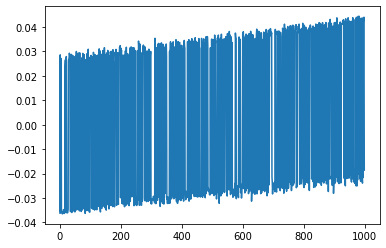

In [205]:
plt.plot(X) #original X

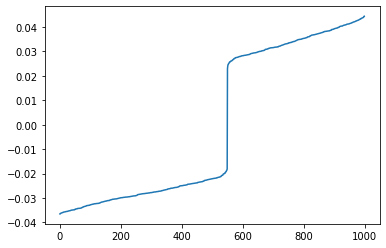

In [251]:
plt.plot(X[Ids]) #sorted X

In [253]:
sum(np.dot(L,X)) #the result is non-zero

1.6830981053317373e-13

In [254]:
sum(np.dot(L,V[:,0])) #due to numerical instability the result is non-zero for the first vector too

-6.141753772226366e-13

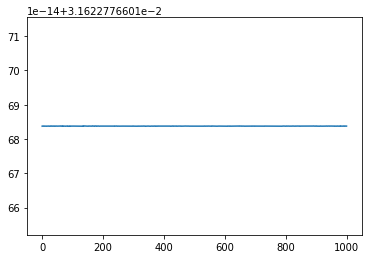

In [256]:
plt.plot(V[:,0]) # but it does not suite our purpose

In [257]:
B=A[Ids,:]#let us sort our matrix according to the new order of the second vector components; first, by rows

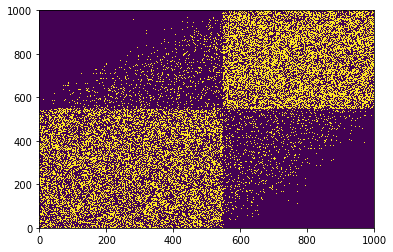

In [263]:
plt.pcolormesh(B[:,Ids]) #second, by columns; we identified our communities

In [260]:
e=np.ones(1000) #just for curiosity, let us check the constant vector

In [261]:
np.dot(L,e) # it corresponds to zero eigenvalue

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [262]:
W[0] #even though due to numeric instability it is not zero in our method

-1.4988715425951263e-14

### 2. Meaningful Partitions of Real Datasets (30%)
"The previous example was rather compelling. However, it was also fake."

We can play with real anonymised data from Yahoo https://www.dropbox.com/s/ii1e09dx6o2ktit/yahoo.zip?dl=0 for web advertisment.

In [264]:
# reading data, 2000 companies, 3000 advertising terms, 
# 92345 connections in the graph showing that a firm buys a term
a = np.genfromtxt('yahoo/us.3k.2k.smat')
a = a.astype(int)
n, m, n_connections = a[0]

In [265]:
#let us put data in the adjacency matrix n x m
A_small = np.zeros((n, m))
A_small[a[1:, 0], a[1:, 1]] = 1

In [266]:
A = np.vstack(
    (np.hstack(
        (np.zeros((n, n)), A_small)
    ),
     np.hstack((A_small.T, np.zeros((m, m))))
    )
)

In [267]:
# let us calcualte the number of non-zero elements (connections)
assert sum(sum(A_small)) == 92345

In [269]:
# let us read terms along with their ids
with open("yahoo/us.3k.2k.trms", 'r') as iofile:
    labels = iofile.readlines()

Perfrom the second task from the tutorial. First, calculate the Laplacian matrix, L=D-A, find its second smallest eigenvector, sort it, and use the found indicies to find interpretable clusters of advertising terms (2-3 such clusters is enough). As an alternative out-of-the-box solution, you can use the implementation of Spectral Clustering with a given number of clusters from scikit-learn: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In [0]:
### Your code here